In [41]:
# automatically reload edited source code
%load_ext autoreload
%autoreload 2

# external package imports
import numpy as np
import pandas as pd
import os, pdb, glob, time, argparse
from os.path import exists, split, isdir, getsize
from sdo_clv_pipeline.sdo_plot import *

# internal package imports
from sdo_clv_pipeline.paths import root
from sdo_clv_pipeline.sdo_io import *
from sdo_clv_pipeline.sdo_process import *
from sdo_clv_pipeline.sdo_io import * 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [53]:
# returns four sorted lists with the path to each of the file types
data_dir = os.path.abspath(os.path.join(os.getcwd(), "..", "data"))
con_files, mag_files, dop_files, aia_files = find_data(data_dir, "2014")
print(con_files)
print(len(con_files))
# print(con_files)
# print(mag_files)
# print(dop_files)
# print(aia_files)

File counts:
CON: 14
MAG: 14
DOP: 14
AIA: 15
[datetime.datetime(2014, 1, 15, 0, 0), datetime.datetime(2014, 1, 3, 0, 0), datetime.datetime(2014, 1, 13, 0, 0), datetime.datetime(2014, 1, 9, 0, 0), datetime.datetime(2014, 1, 11, 0, 0), datetime.datetime(2014, 1, 4, 0, 0), datetime.datetime(2014, 1, 6, 0, 0), datetime.datetime(2014, 1, 17, 0, 0), datetime.datetime(2014, 1, 14, 0, 0), datetime.datetime(2014, 1, 10, 0, 0), datetime.datetime(2014, 1, 7, 0, 0), datetime.datetime(2014, 1, 12, 0, 0), datetime.datetime(2014, 1, 16, 0, 0), datetime.datetime(2014, 1, 5, 0, 0)]
['/Users/srugins/sdo-clv-pipeline/data/hmi.ic_720s.20140103_000000_TAI.1.continuum.fits', '/Users/srugins/sdo-clv-pipeline/data/hmi.ic_720s.20140104_000000_TAI.1.continuum.fits', '/Users/srugins/sdo-clv-pipeline/data/hmi.ic_720s.20140105_000000_TAI.1.continuum.fits', '/Users/srugins/sdo-clv-pipeline/data/hmi.ic_720s.20140106_000000_TAI.1.continuum.fits', '/Users/srugins/sdo-clv-pipeline/data/hmi.ic_720s.20140107_000000_TAI.1

/Users/srugins/sdo-clv-pipeline/data


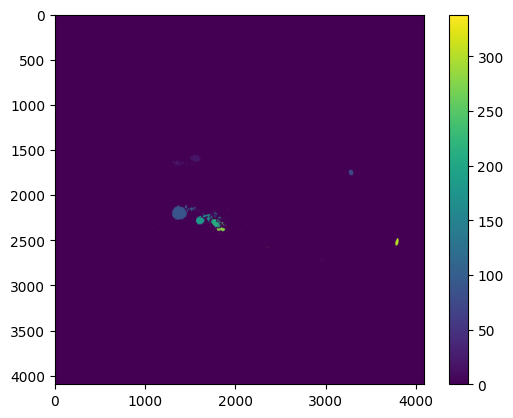

71
2541.0
trying to plot...
0.7188363


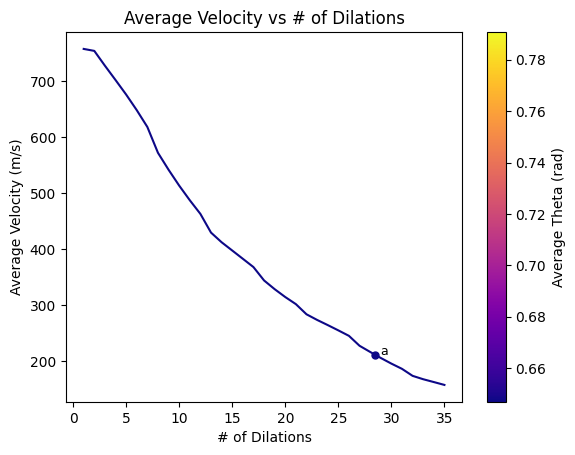

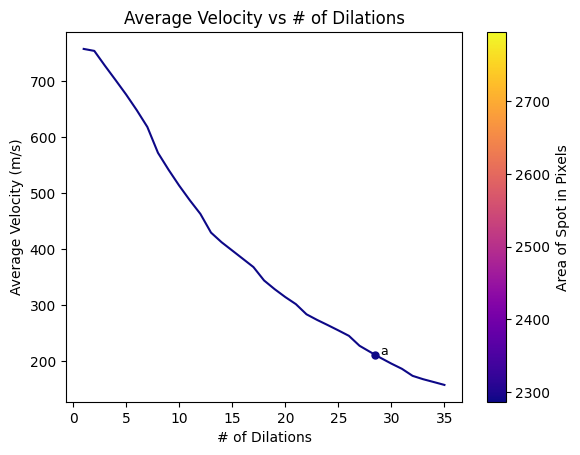

trying to plot...
0.7188363


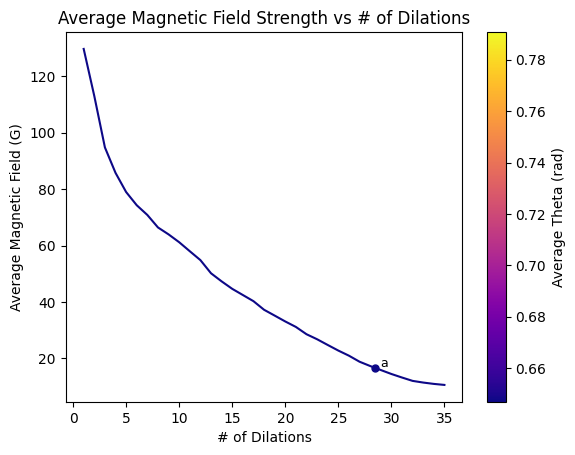

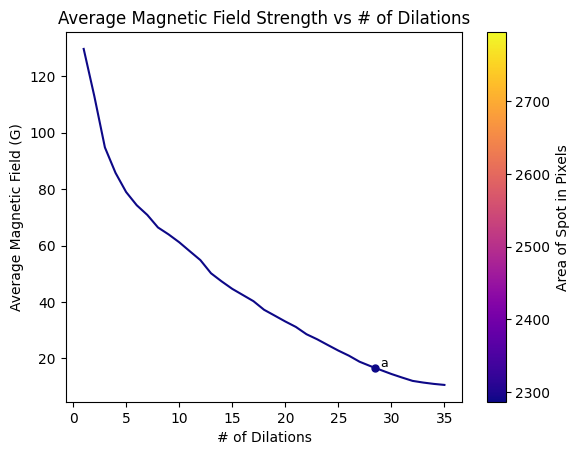

trying to plot...
0.7188363


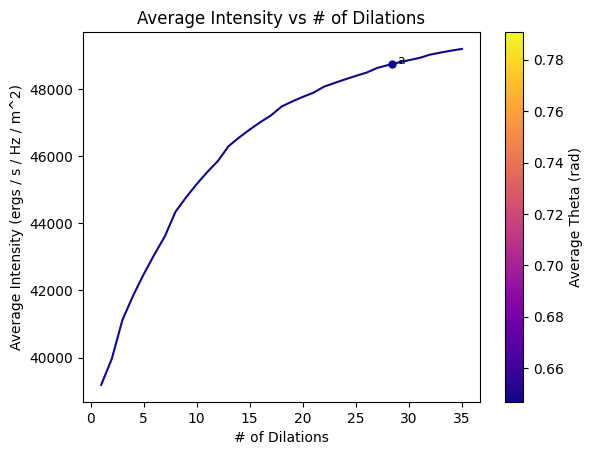

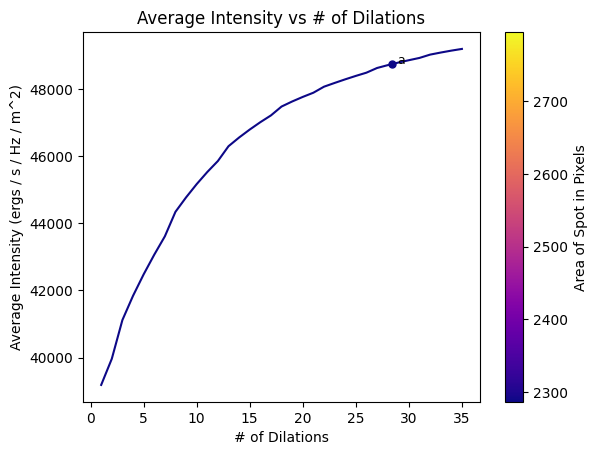

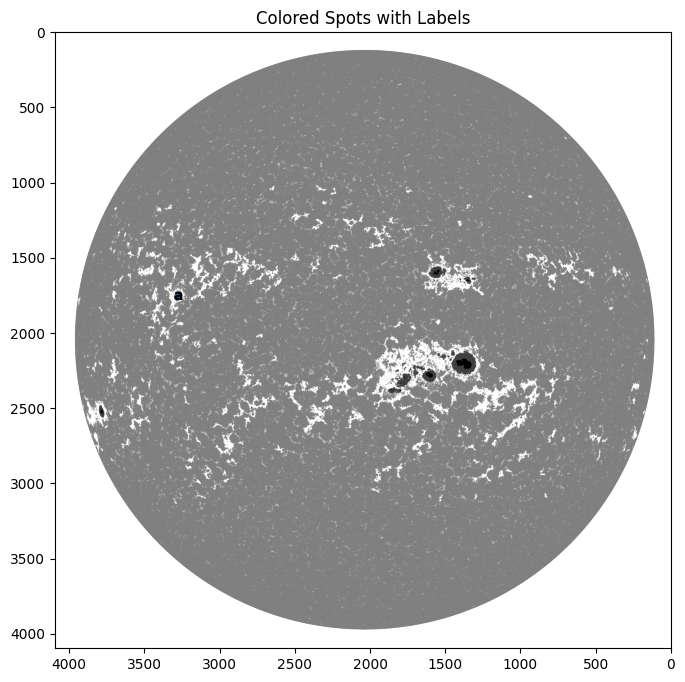

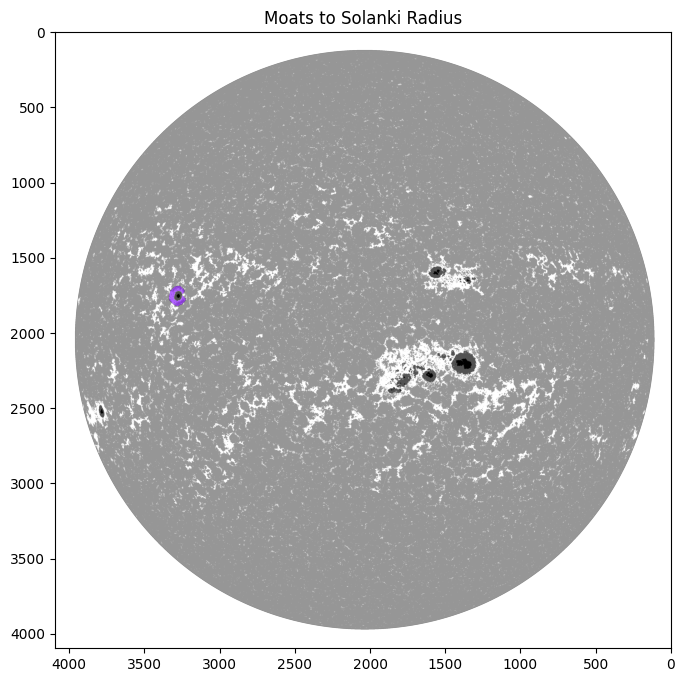

/Users/srugins/sdo-clv-pipeline/data


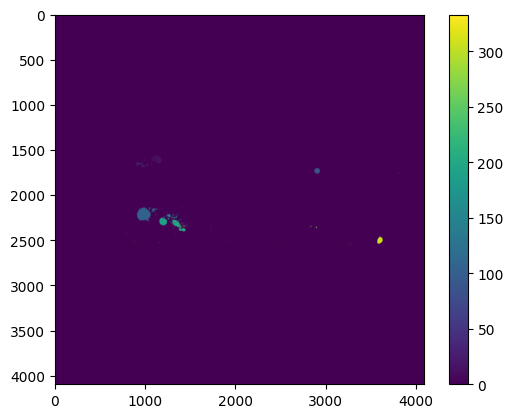

86
3030.0
trying to plot...
0.49515873


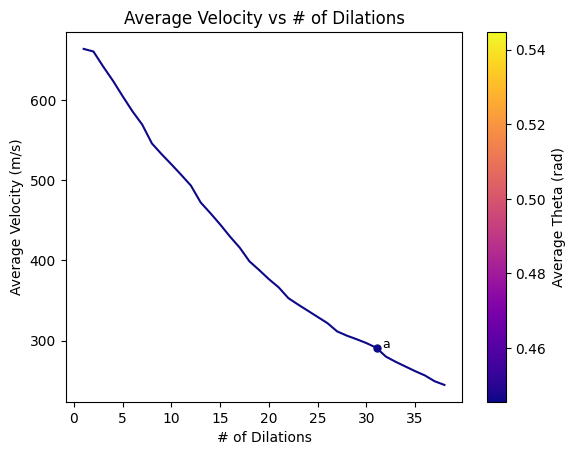

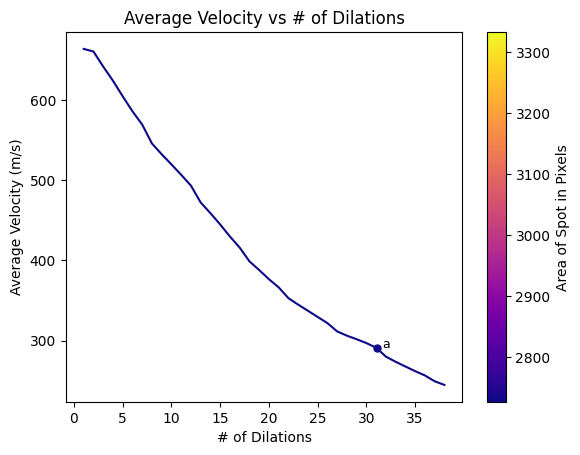

trying to plot...
0.49515873


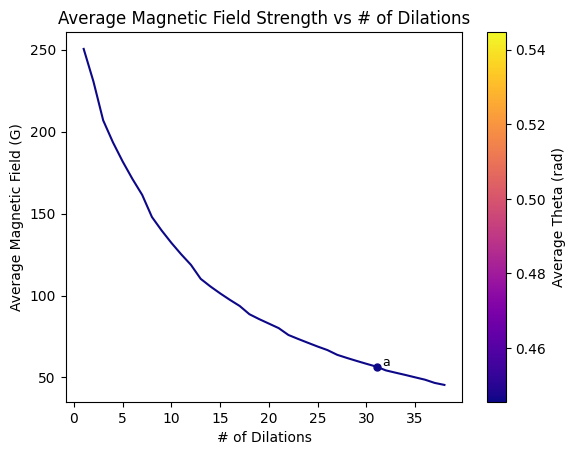

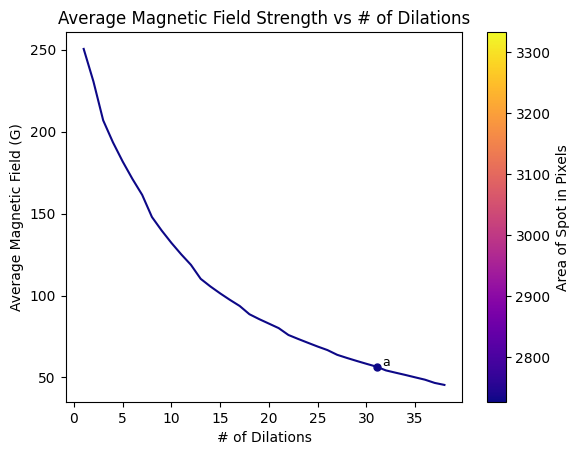

trying to plot...
0.49515873


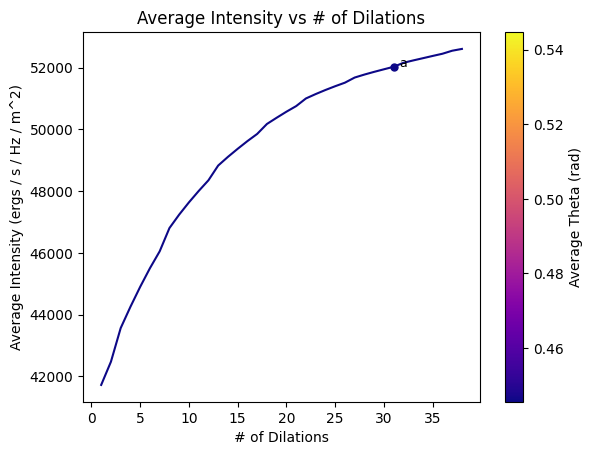

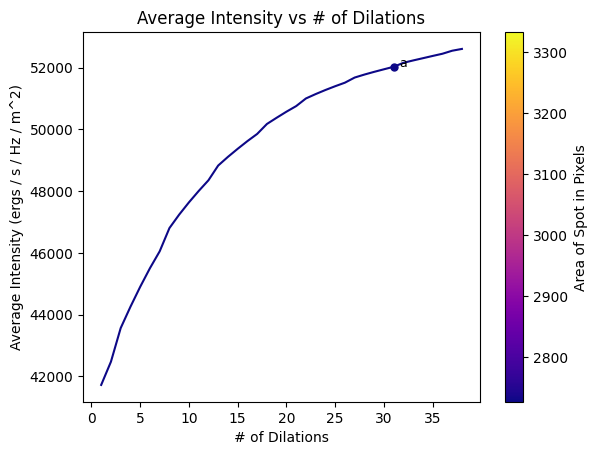

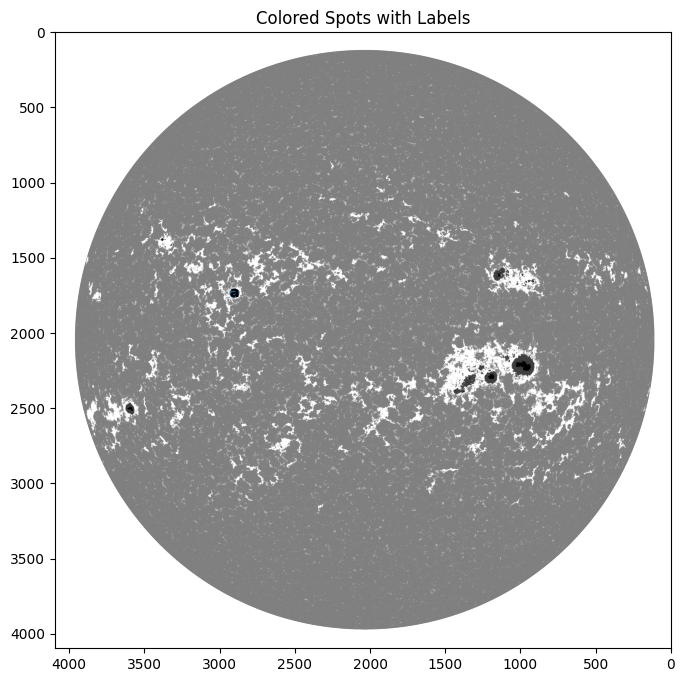

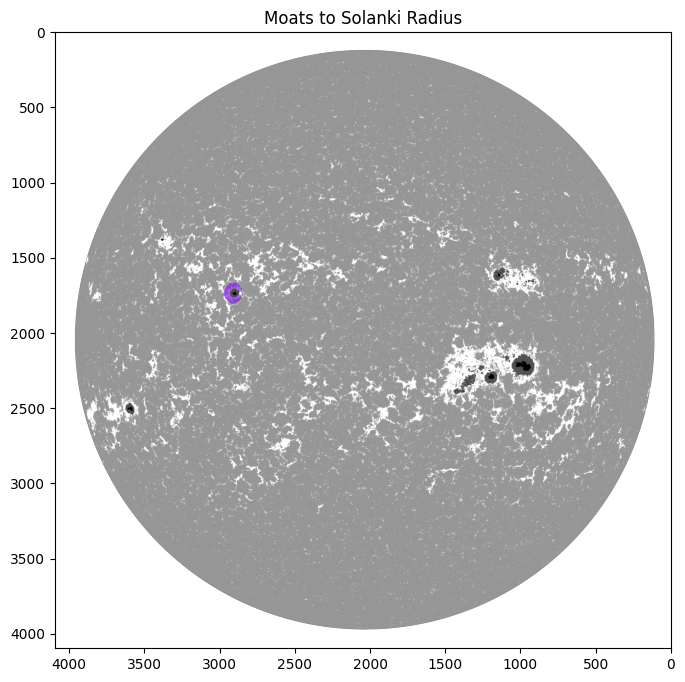

/Users/srugins/sdo-clv-pipeline/data


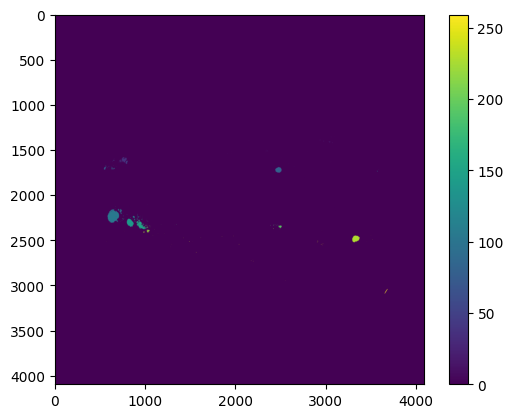

81
3252.0
trying to plot...
0.28419474


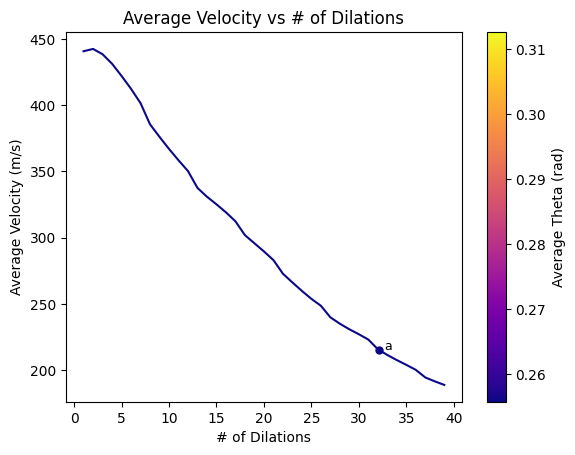

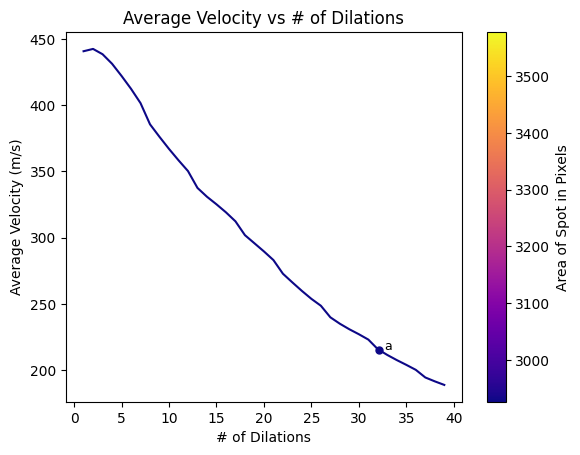

trying to plot...
0.28419474


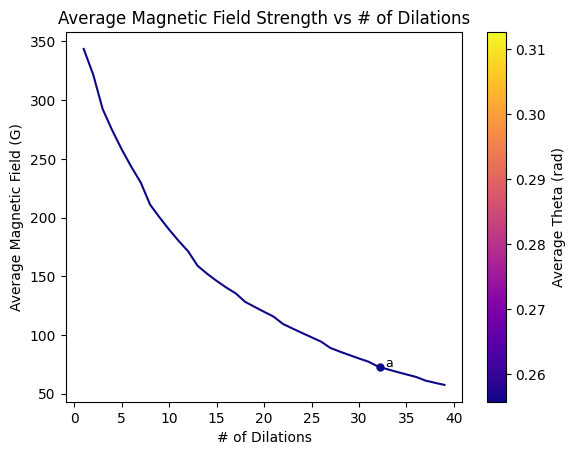

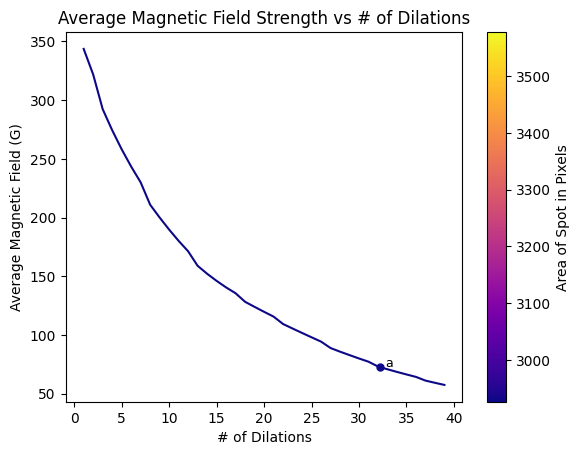

trying to plot...
0.28419474


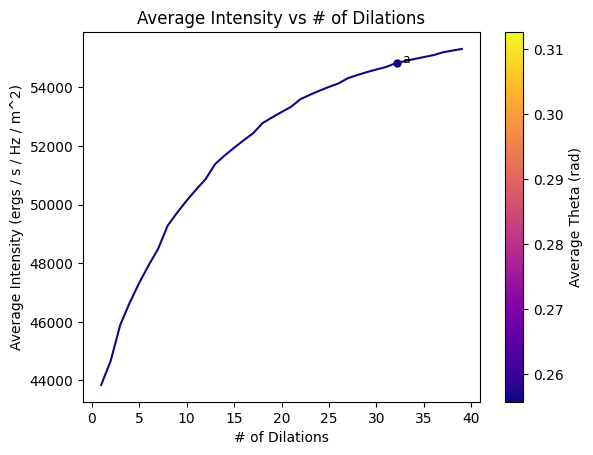

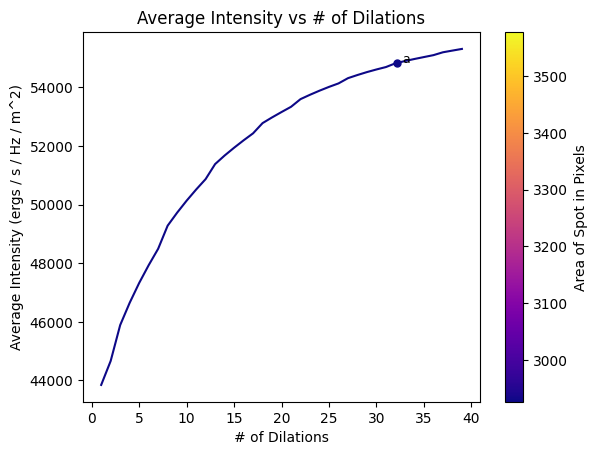

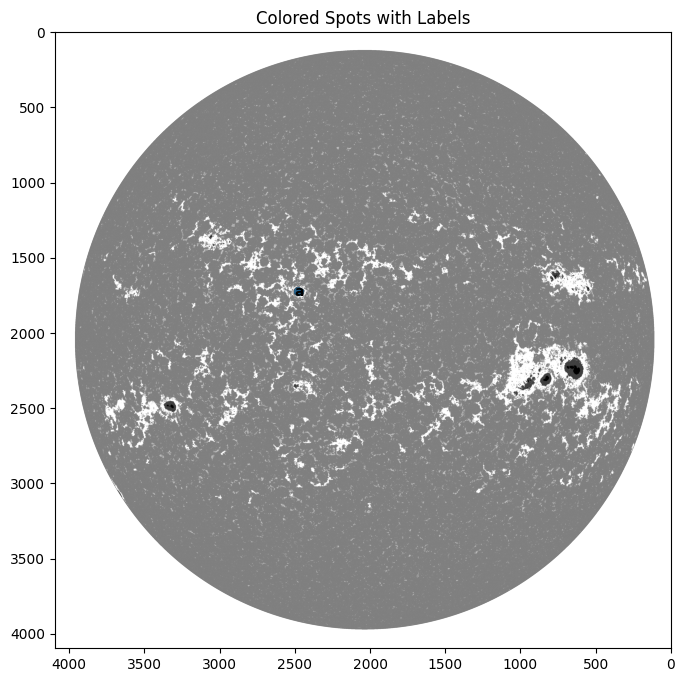

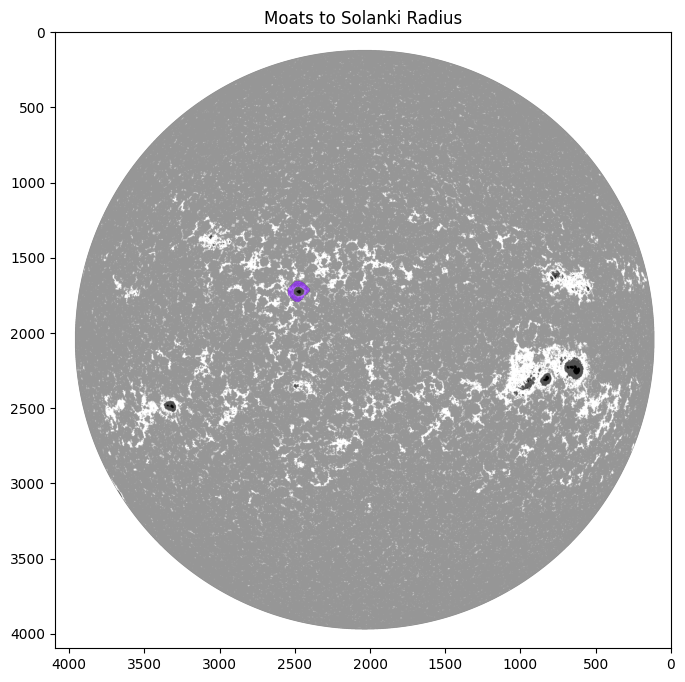

/Users/srugins/sdo-clv-pipeline/data


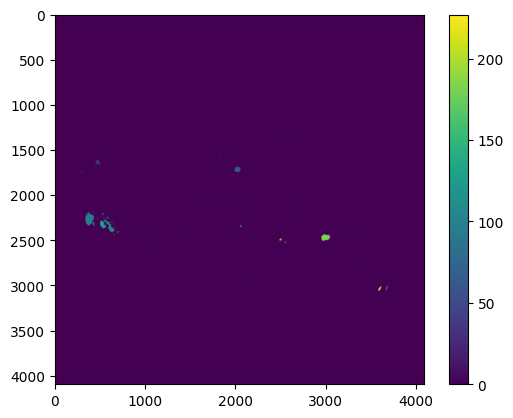

62
3172.0
trying to plot...
0.16934116


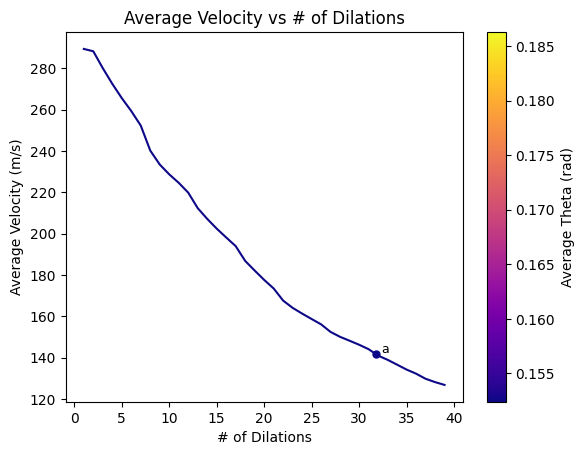

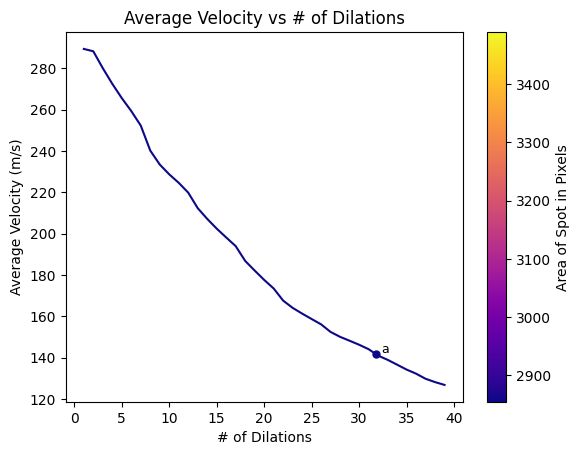

trying to plot...
0.16934116


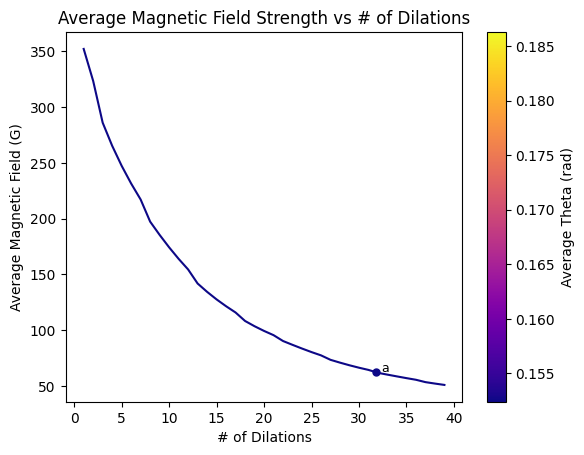

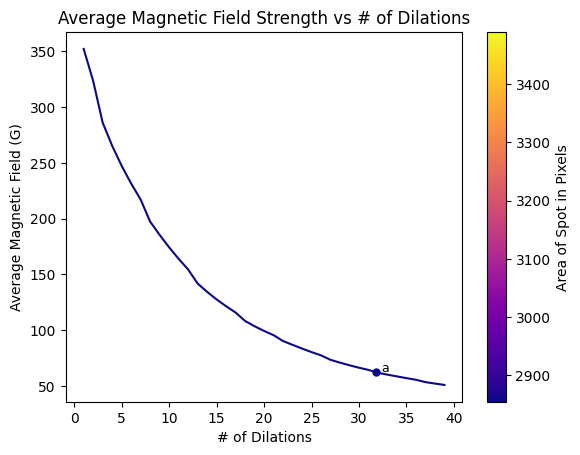

trying to plot...
0.16934116


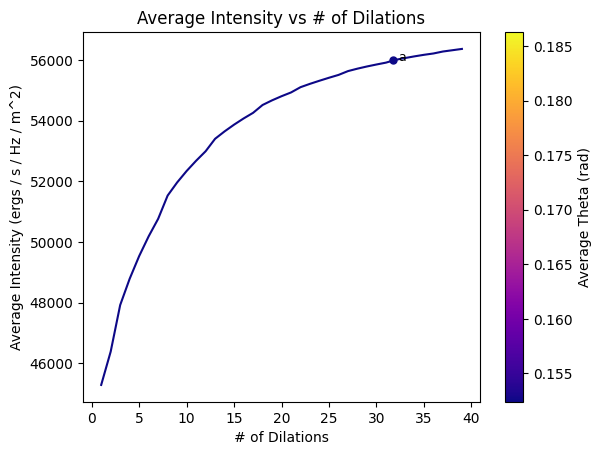

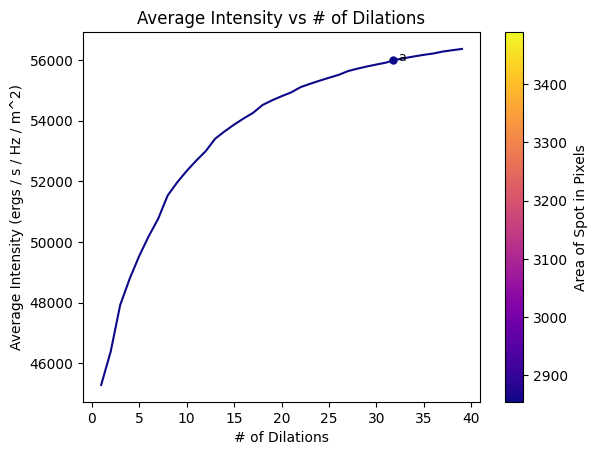

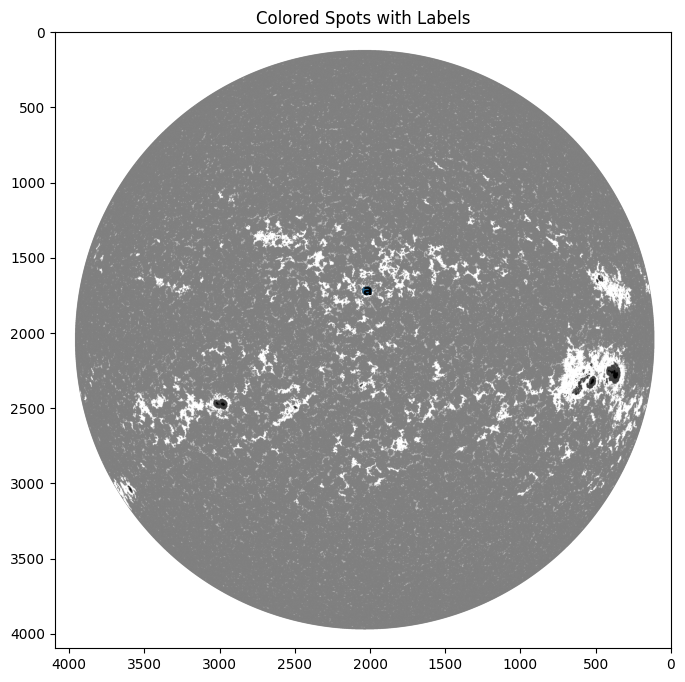

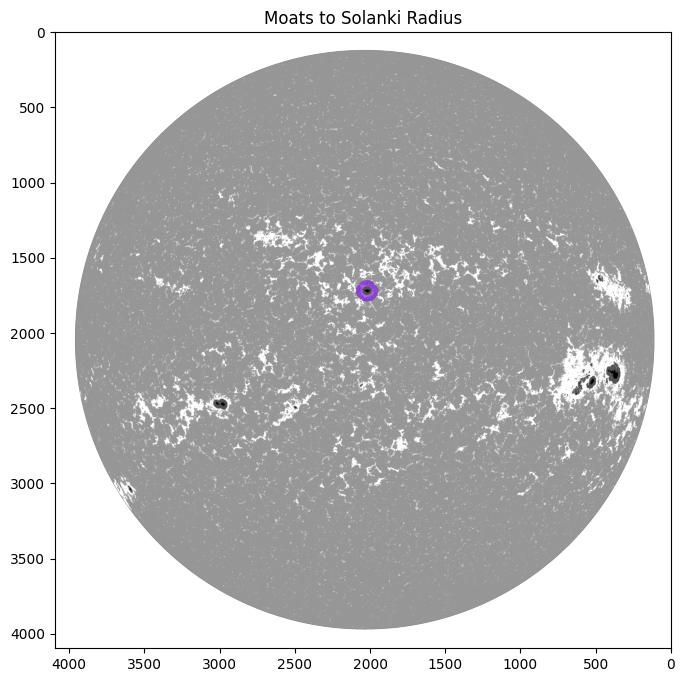

/Users/srugins/sdo-clv-pipeline/data


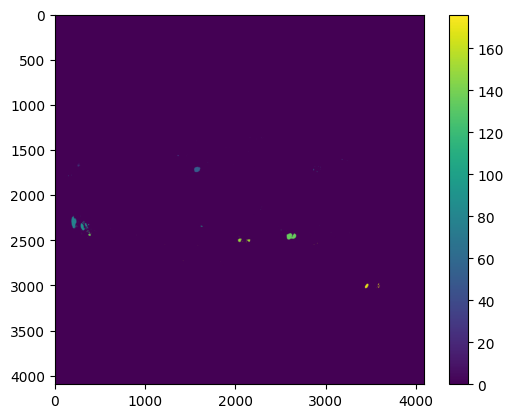

52
3074.0
trying to plot...
0.2980127


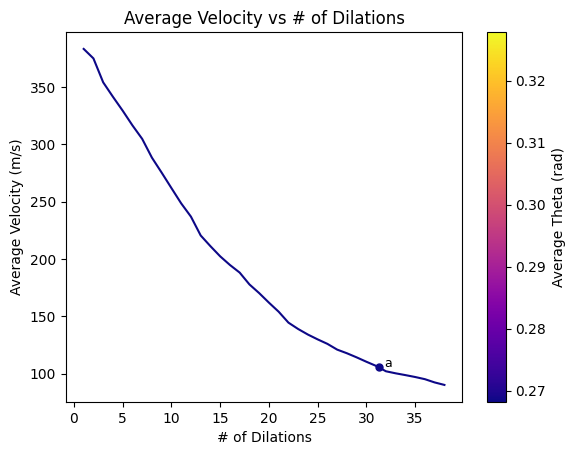

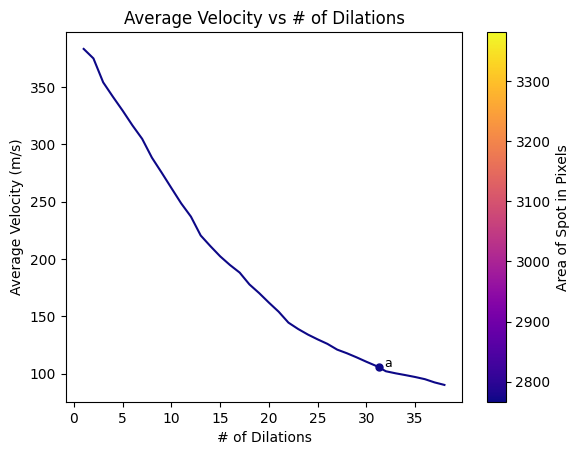

trying to plot...
0.2980127


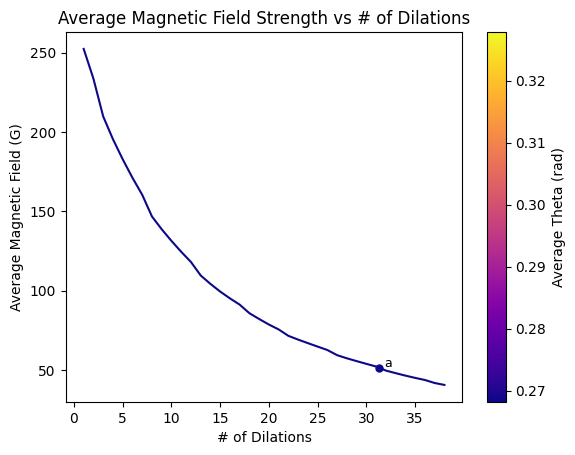

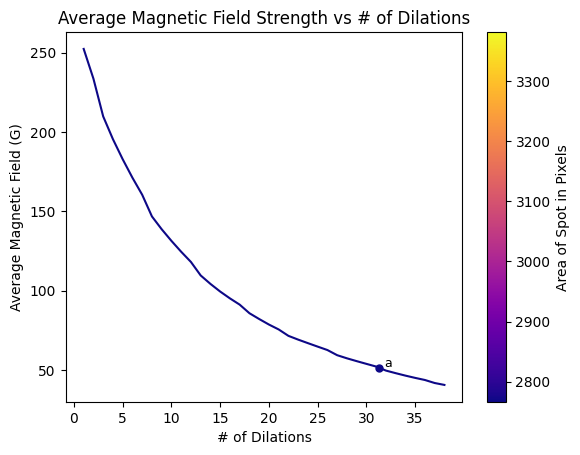

trying to plot...
0.2980127


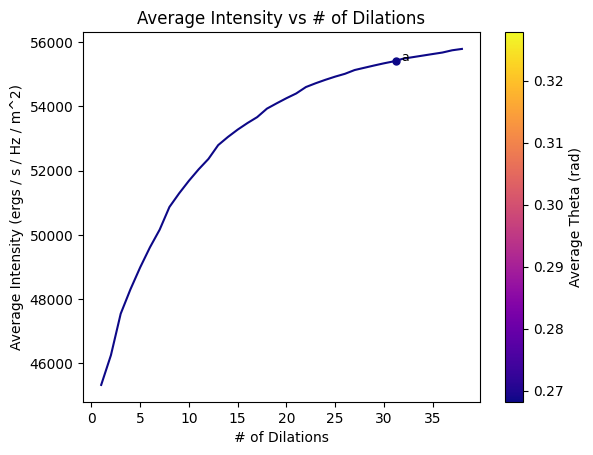

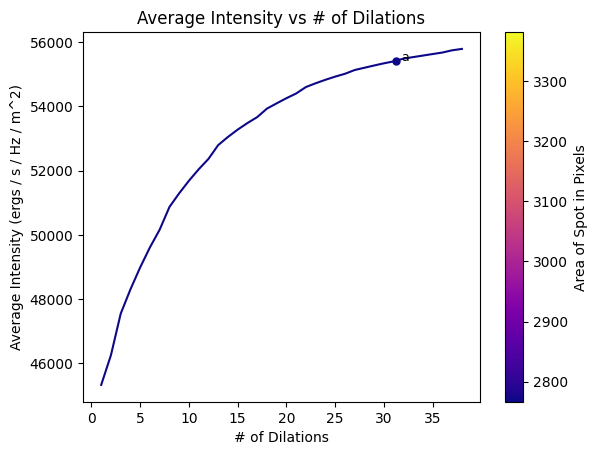

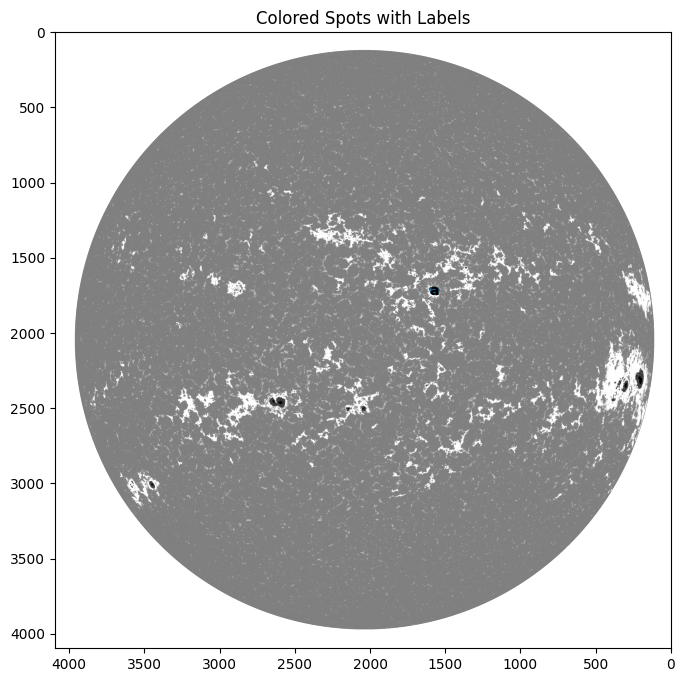

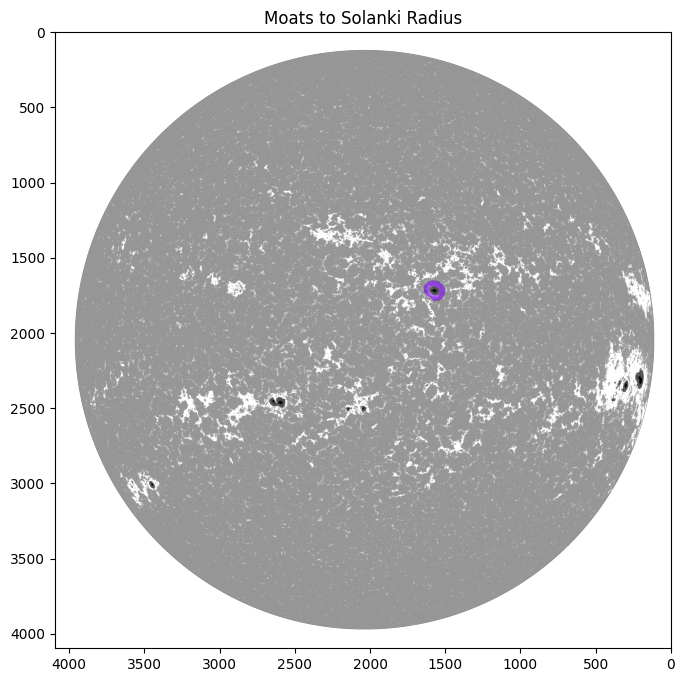

/Users/srugins/sdo-clv-pipeline/data


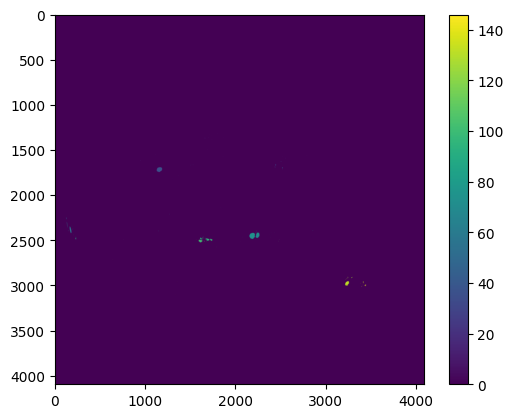

36
2473.0
trying to plot...
0.50705254


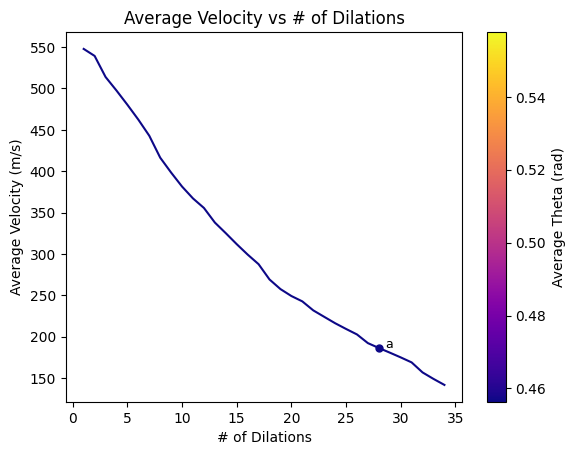

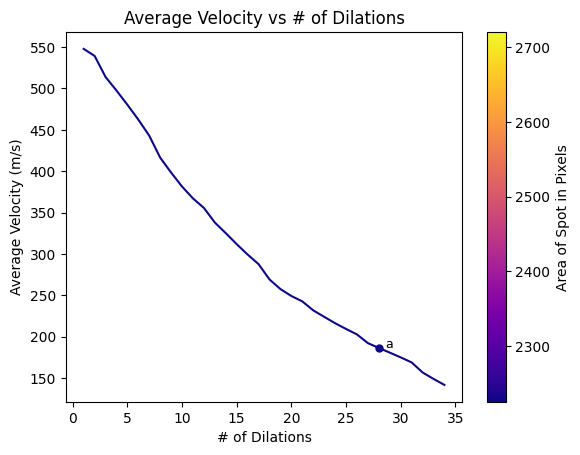

trying to plot...
0.50705254


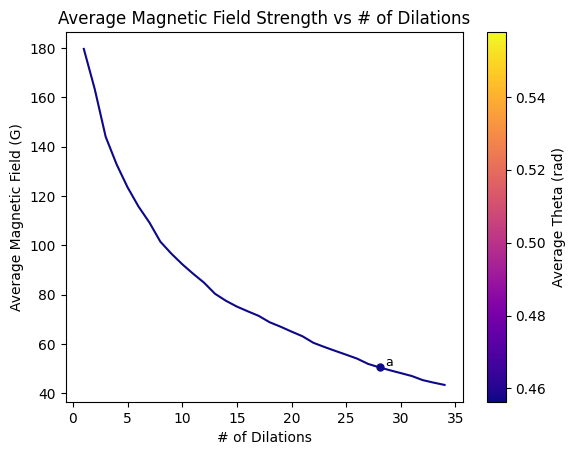

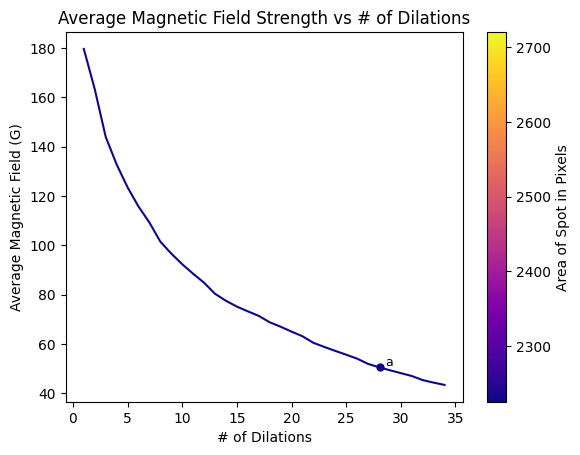

trying to plot...
0.50705254


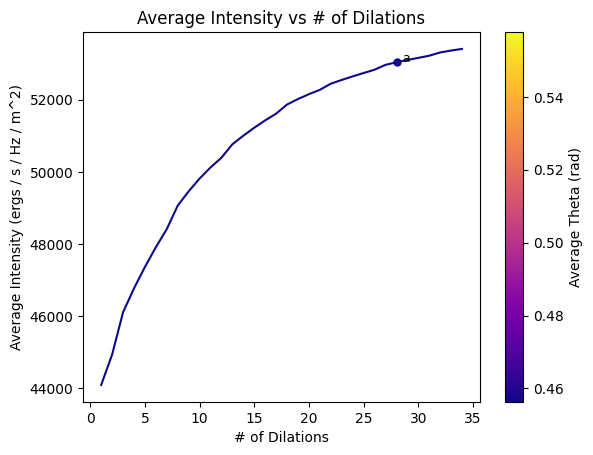

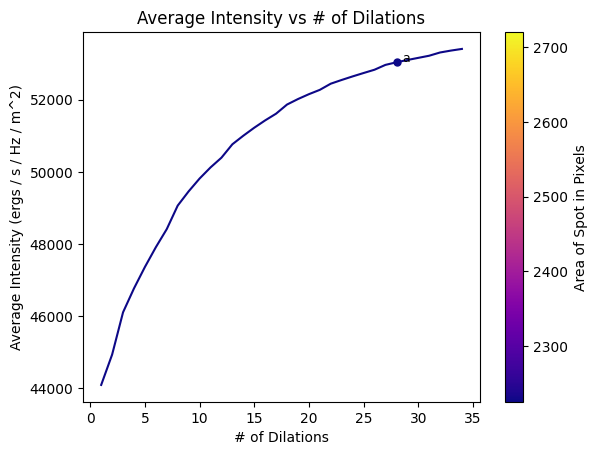

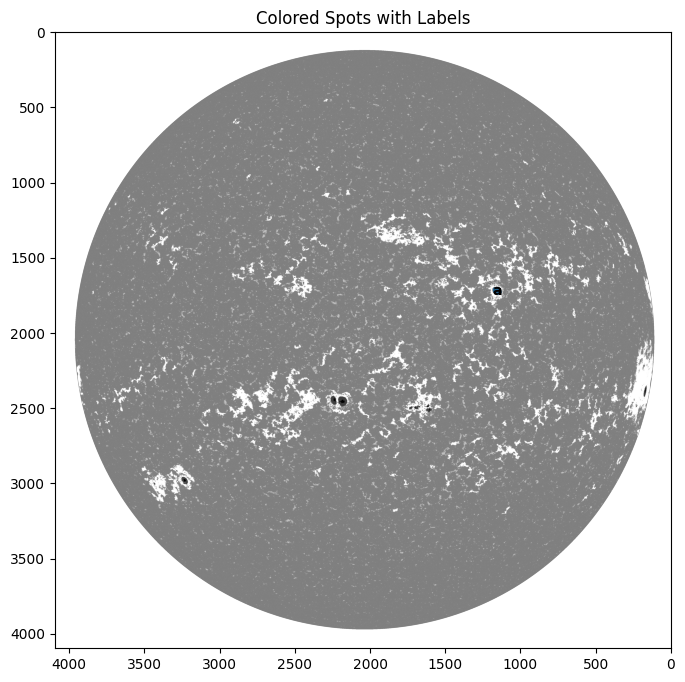

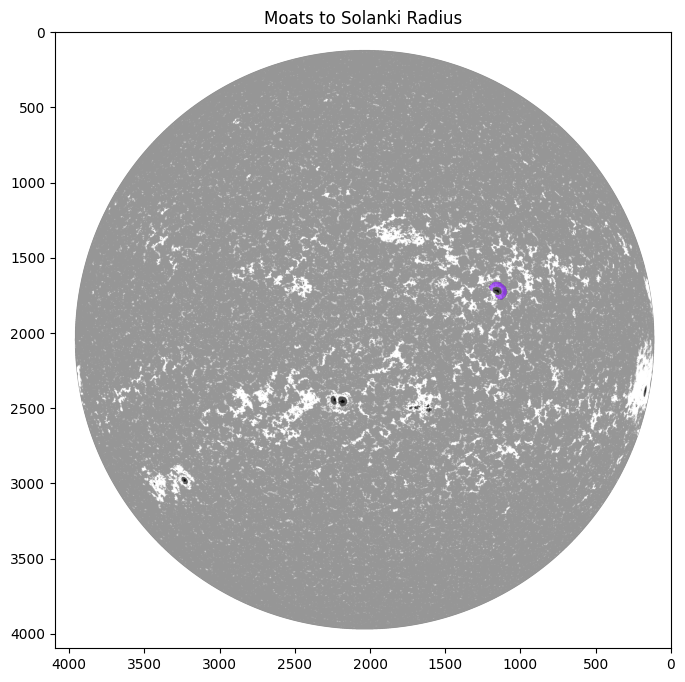

/Users/srugins/sdo-clv-pipeline/data


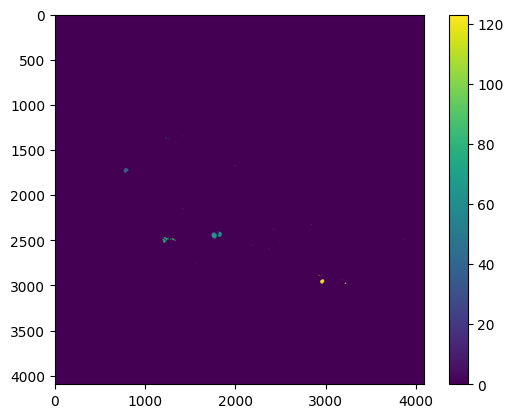

39
1905.0
trying to plot...
0.73029745


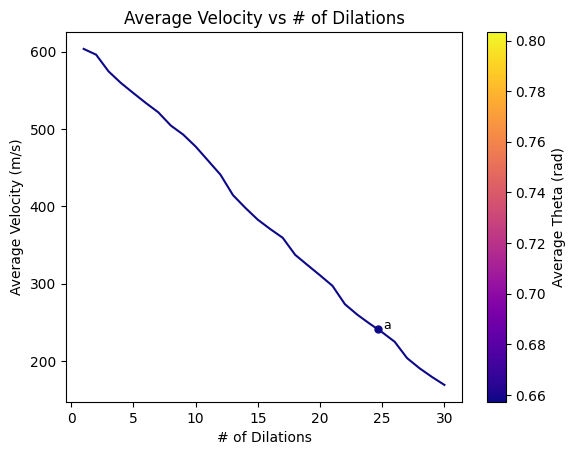

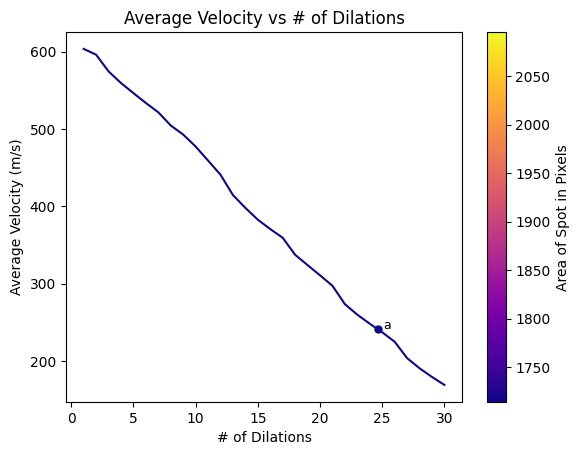

trying to plot...
0.73029745


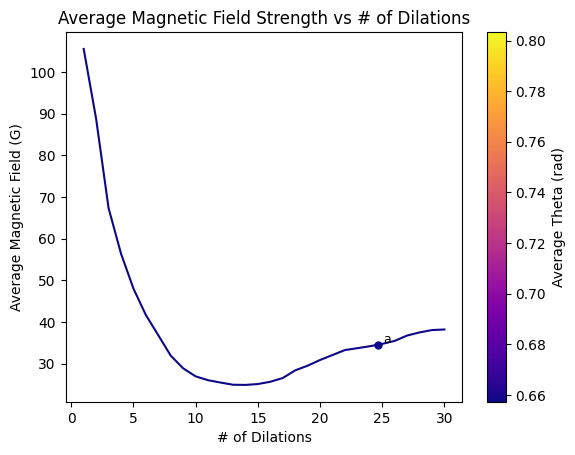

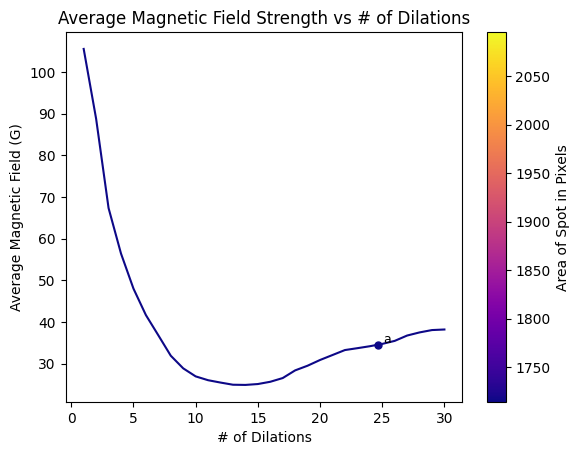

trying to plot...
0.73029745


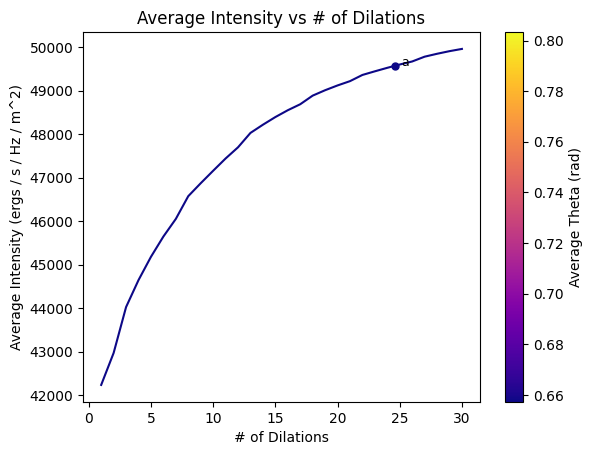

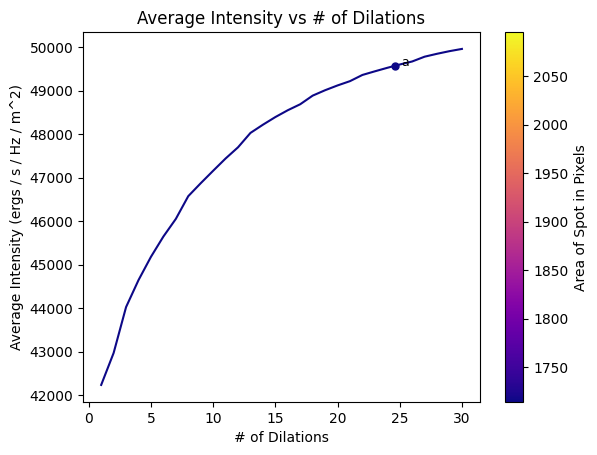

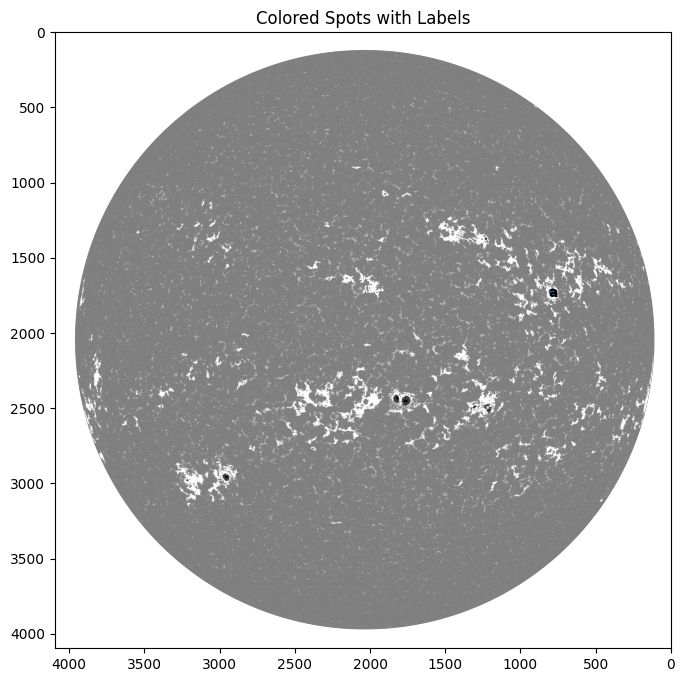

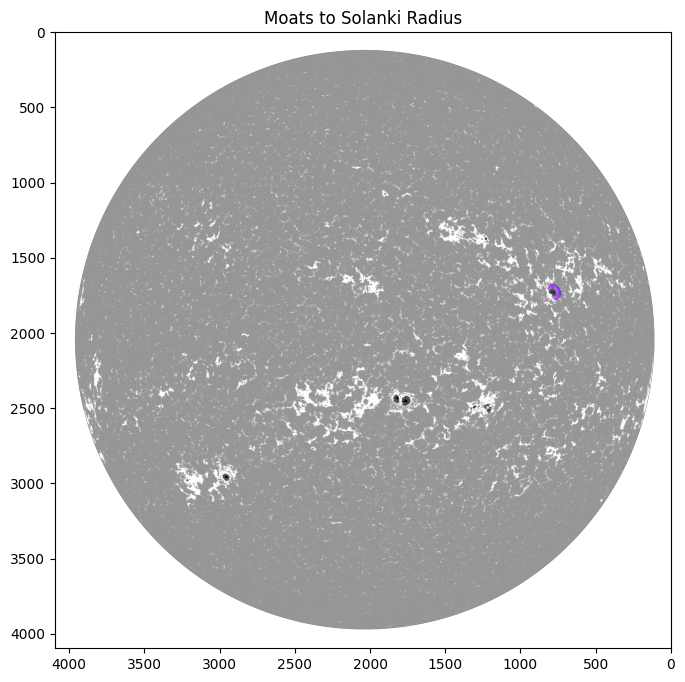

/Users/srugins/sdo-clv-pipeline/data


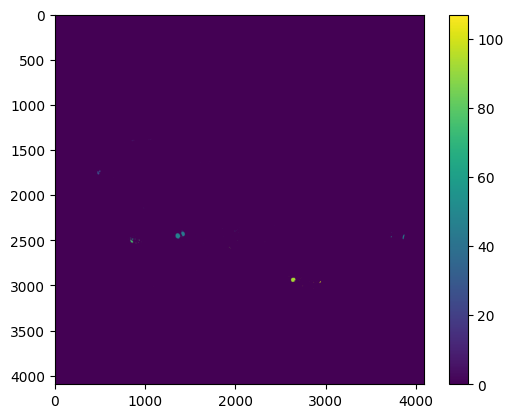

26
567.0
trying to plot...
0.9596837


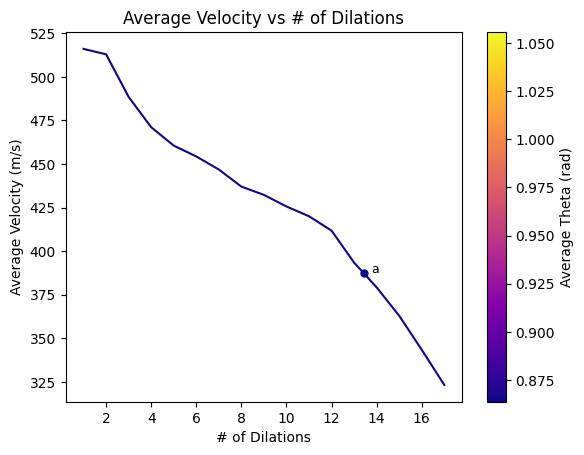

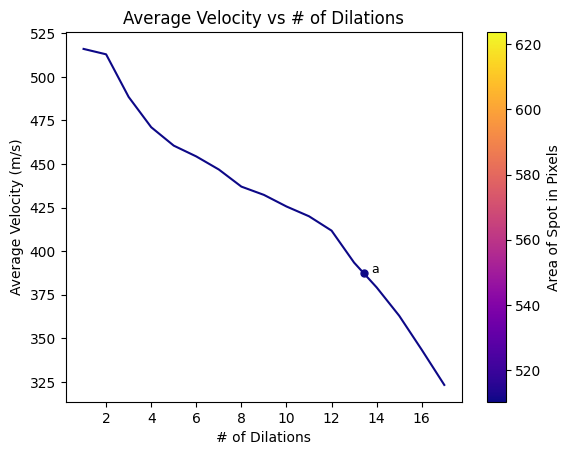

trying to plot...
0.9596837


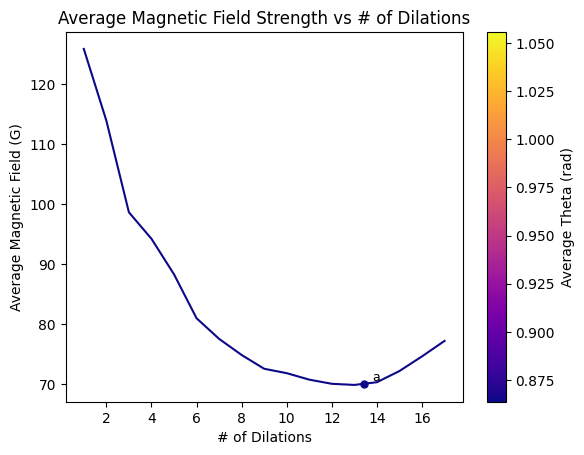

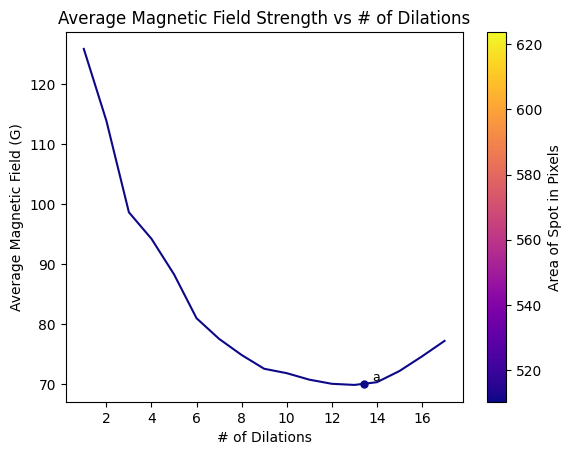

trying to plot...
0.9596837


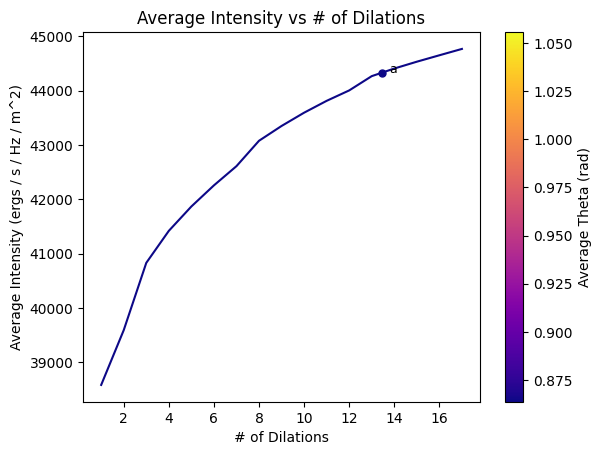

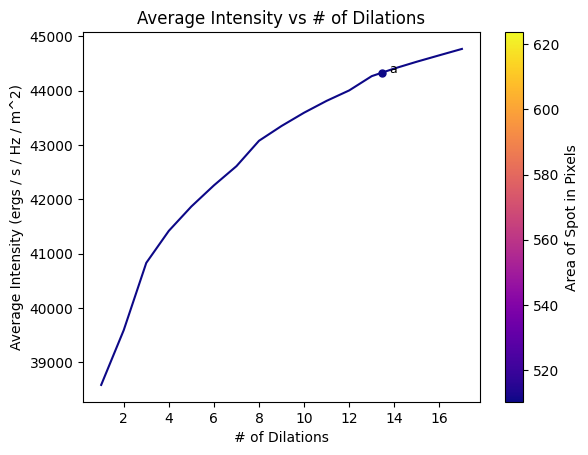

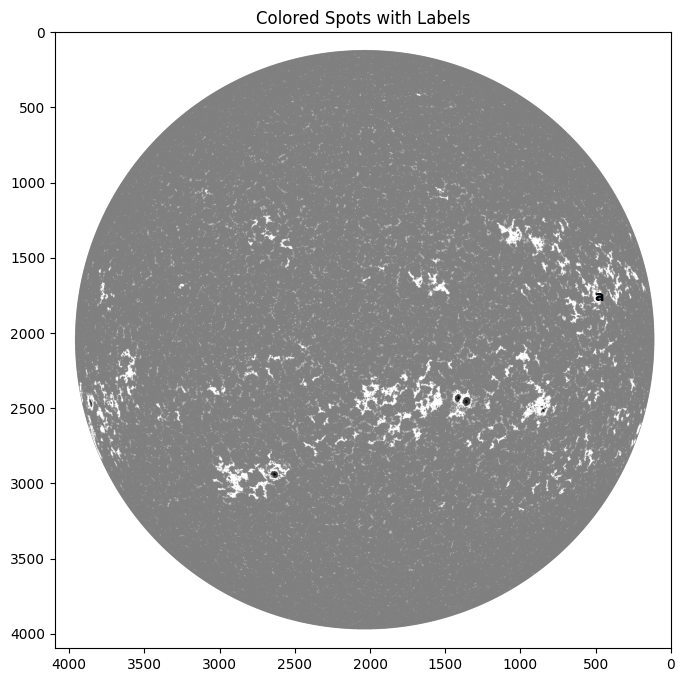

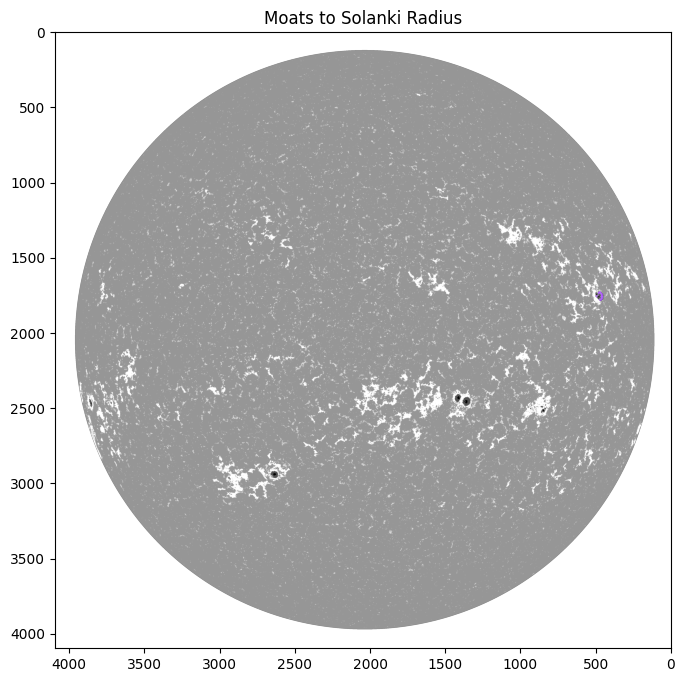

[[[np.float32(757.51263), np.float32(754.0078), np.float32(727.57025), np.float32(702.03754), np.float32(676.0918), np.float32(648.2596), np.float32(618.2381), np.float32(572.13055), np.float32(541.8376), np.float32(513.5498), np.float32(487.45132), np.float32(463.04233), np.float32(429.6719), np.float32(412.43057), np.float32(397.70343), np.float32(382.9448), np.float32(368.14725), np.float32(344.27884), np.float32(328.69632), np.float32(314.6422), np.float32(301.98636), np.float32(283.86417), np.float32(273.81503), np.float32(264.6277), np.float32(255.15964), np.float32(245.39673), np.float32(227.67204), np.float32(216.68341), np.float32(205.93794), np.float32(195.83084), np.float32(186.50035), np.float32(173.9988), np.float32(167.96312), np.float32(162.92084), np.float32(157.8002)], [np.float32(663.38556), np.float32(660.1793), np.float32(641.4379), np.float32(623.7723), np.float32(604.3887), np.float32(585.7012), np.float32(569.16046), np.float32(545.5871), np.float32(532.1433), np

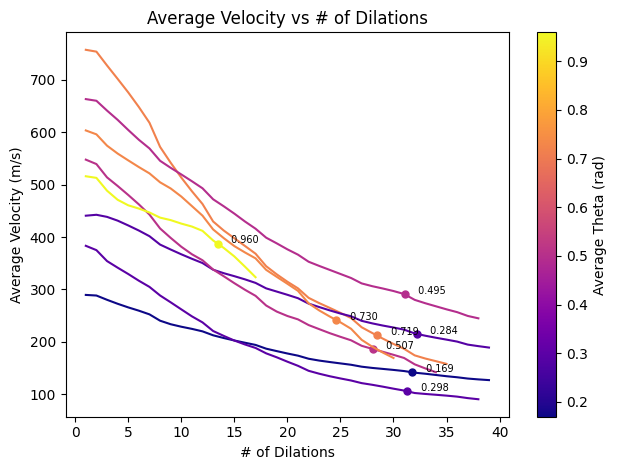

trying to plot...


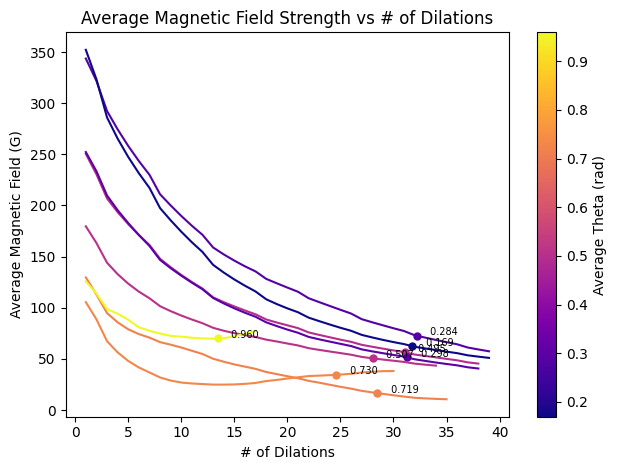

trying to plot...


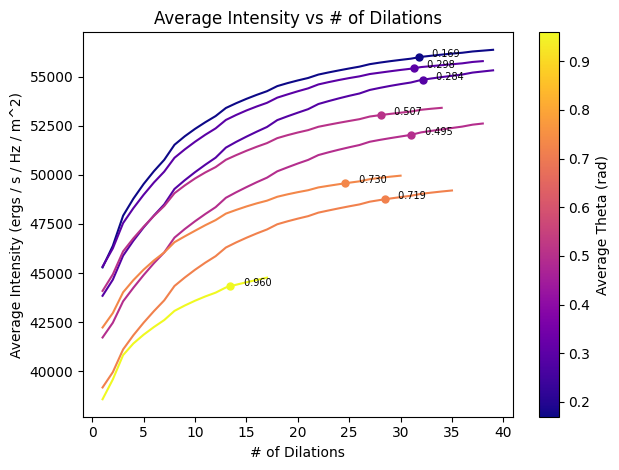

In [57]:
moat_vels = []
moat_mags = []
moat_ints = []
moat_dilations = []
moat_areas = []
moat_thetas = []
moat_vals = []
counter = -1

for i in range (5, 13):
    # define the paths where files live
    con_file = os.path.join(data_dir, con_files[i])
    mag_file = os.path.join(data_dir, mag_files[i])
    dop_file = os.path.join(data_dir, dop_files[i])
    aia_file = os.path.join(data_dir, aia_files[i])
    print(data_dir)

    # create the SDOImage object instances
    con = SDOImage(con_file)     # continuum, Relative HMI continuum intensity
    mag = SDOImage(mag_file)     # magnetogram, magnetic field strength
    dop = SDOImage(dop_file)     # Dopplergram, LOS velocity
    aia = SDOImage(aia_file)     # AIA 1700 continuum filtergram, Relative 1700 Angstrom Continuum Intensity

    # do the coordinate transforms, etc.
    dop.calc_geometry()
    con.inherit_geometry(dop)
    mag.inherit_geometry(dop)

    aia.rescale_to_hmi(con) # reproject onto plate scale of HMI images

    # calculate the limb darkening correction
    con.calc_limb_darkening()
    aia.calc_limb_darkening()

    # correct magnetogram for foreshortening
    mag.correct_magnetogram()

    # calculate differential rot., meridional circ., obs. vel, grav. redshift, cbs
    dop.correct_dopplergram(fit_cbs=False)

    # set values to nan for mu less than mu_thresh
    mu_thresh = 0.1
    con.mask_low_mu(mu_thresh)
    dop.mask_low_mu(mu_thresh)
    mag.mask_low_mu(mu_thresh)
    aia.mask_low_mu(mu_thresh)

    counter += 1

    mask = SunMask(con, mag, dop, aia, moat_vels, moat_mags, moat_ints, moat_dilations, moat_thetas, moat_areas, moat_vals, counter)
    mask.mask_low_mu(mu_thresh)

    label_moats_on_sun(mask)

# plot
moat_vals, moat_dilations, moat_thetas, moat_areas = SunMask.get_moat_properties(mask)
print(moat_vals)
from sdo_clv_pipeline.plot_moats_data import plot_loop
plot_loop(moat_vals, moat_dilations, moat_thetas, moat_areas)